<a href="https://colab.research.google.com/github/kzhkAKT/ATS2022/blob/main/ATS2022_AXT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 国際化と高大連携を踏まえた理数教育教材の開発
#@markdown -線形振動から非線形振動の教材構築-


#1自由度（線形）振幅・位相

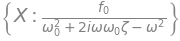

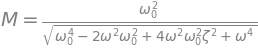

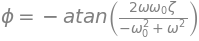

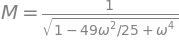

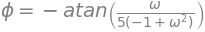

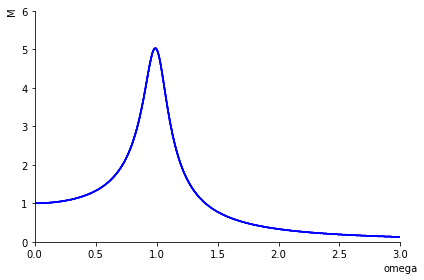

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


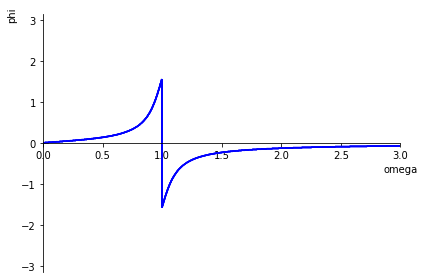

In [ ]:
#@title 基本
#@markdown 1自由度線形：振幅応答 $M$, 位相応答 $\phi$
from sympy import *
init_printing()

z = symbols('z')
omg, f0, phi= symbols('omega, f_0, varphi', positive=True)
t, omg0, zt = symbols('t, omega_0, zeta', positive=True)
X= symbols('X')
M, phi = symbols('M, phi', positive=True)

z = X*exp(I*(omg*t))
display(z)
dfeq_z = Eq(diff(z,t,2) + omg0**2*z + 2*omg0*zt*diff(z,t,1), f0*exp(I*(omg*t)))
display(dfeq_z)

slvd = solve([dfeq_z.subs({t:0})], X)
display(slvd)
amp = Eq(M, (abs(slvd[X])/(f0/omg0**2)).simplify())
pha = Eq(phi, atan((abs(im(slvd[X]))/(re(slvd[X]))).simplify()))
display(amp, pha)

cnd = {omg0:1, zt:Rational(1,10)} #ここで任意の定数(固有振動数、減衰比)を決める。
amp_cnd = amp.subs(cnd)
pha_cnd = pha.subs(cnd)
display(amp_cnd, pha_cnd)

p_amp = plot_implicit(amp_cnd, (omg, 0, 3), (M, 0, 6),adaptive=False,points=1000)
p_pha = plot_implicit(pha_cnd, (omg, 0, 3), (phi, -pi, pi),adaptive=False,points=1000)

##応用

###より見やすいグラフ作成
----SymPyで求めた応答の式を一度NumPyに持っていき(数値計算に特化しているため)、そこからMatplotlibを使うことでSymPy.plotよりも見やすいグラフを描写できる。

<ipython-input-4-4ee23639e6d7>:10: RuntimeWarning: divide by zero encountered in true_divide
  M = 1/np.sqrt((1-omg**2)**2 + (2*zt*omg)**2)


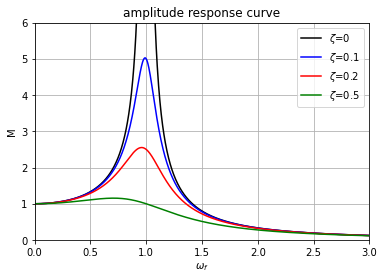

In [ ]:
#@title 振幅応答曲線(amplitude response curve)
#@markdown $\zeta$ 変化に伴う振幅応答
import numpy as np
import matplotlib.pyplot as plt

omg0=1

(zt)=(0)
omg=np.linspace(0,3,1000)
M = 1/np.sqrt((1-omg**2)**2 + (2*zt*omg)**2)
plt.plot(omg,M, color="k", label="$\zeta$=0")#, linestyle ="dashed")

(zt1)=(0.1)
M1 = 1/np.sqrt((1-omg**2)**2 + (2*zt1*omg)**2)
plt.plot(omg,M1, color="b", label="$\zeta$=0.1")#, linestyle ="dashed")

(zt2)=(0.2)
M2 = 1/np.sqrt((1-omg**2)**2 + (2*zt2*omg)**2)
plt.plot(omg,M2, color="r", label="$\zeta$=0.2")#, linestyle ="dashed")

(zt3)=(0.5)
M3 = 1/np.sqrt((1-omg**2)**2 + (2*zt3*omg)**2)
plt.plot(omg,M3, color="g", label="$\zeta$=0.5")#, linestyle ="dashed")

plt.xlim(0,3)
plt.ylim(0,6)
plt.xlabel('$\omega_f$')
plt.ylabel('M')
plt.title('amplitude response curve')
plt.grid()
plt.legend()
plt.tight_layout

plt.show()

<ipython-input-1-bdc7d4f9f755>:11: RuntimeWarning: divide by zero encountered in true_divide
  phi = np.arctan((2*zt*(omg/omg0))/(1 - (omg/omg0)**2))
<ipython-input-1-bdc7d4f9f755>:17: RuntimeWarning: divide by zero encountered in true_divide
  phi1 = np.arctan((2*zt1*(omg/omg0))/(1 - (omg/omg0)**2))
<ipython-input-1-bdc7d4f9f755>:23: RuntimeWarning: divide by zero encountered in true_divide
  phi2 = np.arctan((2*zt2*(omg/omg0))/(1 - (omg/omg0)**2))
<ipython-input-1-bdc7d4f9f755>:29: RuntimeWarning: divide by zero encountered in true_divide
  phi3 = np.arctan((2*zt3*(omg/omg0))/(1 - (omg/omg0)**2))


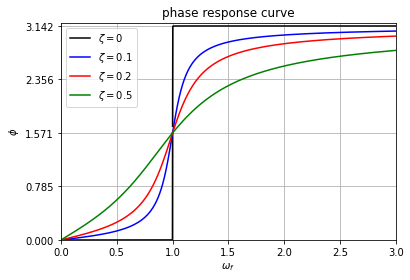

In [ ]:
#@title 位相応答曲線(phase response curve)
#@markdown $\zeta$ 変化に伴う位相応答
import numpy as np
import matplotlib.pyplot as plt

omg0=1
omg = np.linspace(0,1,1000)
omgs = np.linspace(1.000001,3,1000)

(zt)=(0.00001)
phi = np.arctan((2*zt*(omg/omg0))/(1 - (omg/omg0)**2))
phis = np.arctan((2*zt*(omgs/omg0))/(1 - (omgs/omg0)**2)) + np.pi
plt.plot(omg,phi, color="k", label="$\zeta=0$")#, linestyle ="dashed")
plt.plot(omgs,phis, color="k")#, linestyle ="dashed")

(zt1)=(0.1)
phi1 = np.arctan((2*zt1*(omg/omg0))/(1 - (omg/omg0)**2))
phi1s = np.arctan((2*zt1*(omgs/omg0))/(1 - (omgs/omg0)**2)) + np.pi
plt.plot(omg,phi1, color="b", label="$\zeta=0.1$")
plt.plot(omgs,phi1s, color="b")

(zt2)=(0.2)
phi2 = np.arctan((2*zt2*(omg/omg0))/(1 - (omg/omg0)**2))
phi2s = np.arctan((2*zt2*(omgs/omg0))/(1 - (omgs/omg0)**2)) + np.pi
plt.plot(omg,phi2, color="r", label="$\zeta=0.2$")
plt.plot(omgs,phi2s, color="r")

(zt3)=(0.5)
phi3 = np.arctan((2*zt3*(omg/omg0))/(1 - (omg/omg0)**2))
phi3s = np.arctan((2*zt3*(omgs/omg0))/(1 - (omgs/omg0)**2)) + np.pi
plt.plot(omg,phi3, color="g", label="$\zeta=0.5$")
plt.plot(omgs,phi3s, color="g")

plt.xlim(0,3)
plt.ylim(0,np.pi+0.05)
plt.yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
plt.xlabel('$\omega_f$')
plt.ylabel('$\phi$')
plt.title('phase response curve')
plt.legend()
plt.tight_layout
plt.grid()

plt.show()

#2自由度（線形）振幅・位相

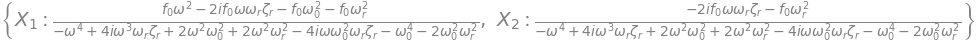

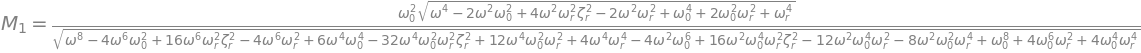

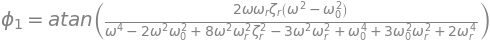

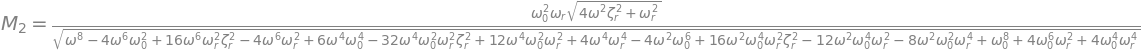

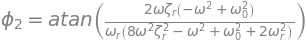

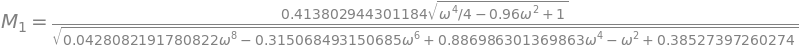

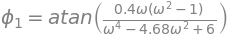

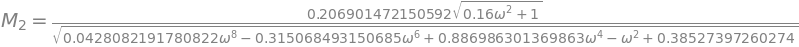

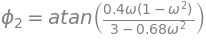

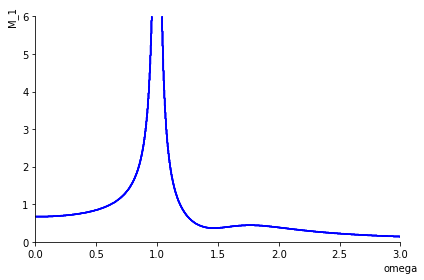

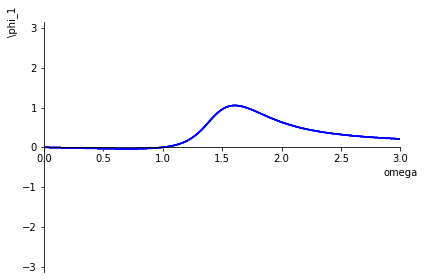

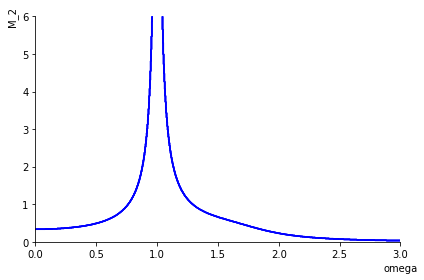

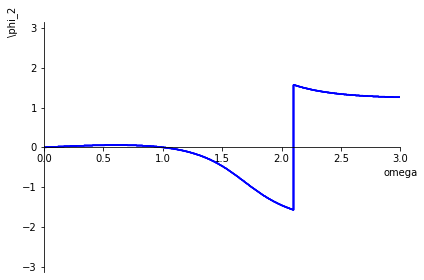

In [ ]:
#@title 基本
#@markdown ２自由度線形：振幅応答 $M$, 位相応答 $\phi$
from sympy import *
init_printing()

z1, z2 = symbols('z1, z2')
omg, f0, phi= symbols('omega, f_0, varphi', positive=True)
t, omg0, omgr, ztr = symbols('t, omega_0, omega_r, zeta_r', positive=True)
X1, X2 = symbols('X_1, X_2')
a = symbols('a', real=True)
M1, M2, phi1, phi2 = symbols('M_1, M_2, \phi_1, \phi_2', positive=True)

z1 = X1*exp(I*(omg*t))
z2 = X2*exp(I*(omg*t))
display(z1,z2)
dfeq_z1 = Eq(diff(z1,t,2) + omg0**2*z1 - omgr**2*(z2-z1) - 2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1) ), f0*exp(I*(omg*t)))
dfeq_z2 = Eq(diff(z2,t,2) + omg0**2*z2 + omgr**2*(z2-z1) + 2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1) ), 0)
display(dfeq_z1, dfeq_z2)

slvd = solve([dfeq_z1.subs({t:0}), dfeq_z2.subs({t:0})], X1, X2)
display(slvd)

amp1 = Eq(M1, (abs(slvd[X1])/(f0/omg0**2)).simplify())
pha1 = Eq(phi1, atan((im(slvd[X1])/re(slvd[X1])).simplify()))
amp2 = Eq(M2, (abs(slvd[X2])/(f0/omg0**2)).simplify())
pha2 = Eq(phi2, atan((im(slvd[X2])/re(slvd[X2])).simplify()))
display(amp1, pha1, amp2, pha2)

cnd = {omg0:1, omgr:1, ztr:0.2} #ここで任意の定数(固有振動数、減衰比)を決める。
amp1_cnd = amp1.subs(cnd)
pha1_cnd = pha1.subs(cnd)
amp2_cnd = amp2.subs(cnd)
pha2_cnd = pha2.subs(cnd)
display(amp1_cnd, pha1_cnd, amp2_cnd, pha2_cnd)

p_amp1 = plot_implicit(amp1_cnd, (omg, 0, 3), (M1, 0, 6),adaptive=False,points=1000)
p_pha1 = plot_implicit(pha1_cnd, (omg, 0, 3), (phi1, -pi, pi),adaptive=False,points=1000)
p_amp2 = plot_implicit(amp2_cnd, (omg, 0, 3), (M2, 0, 6),adaptive=False,points=1000)
p_pha2 = plot_implicit(pha2_cnd, (omg, 0, 3), (phi2, -pi, pi),adaptive=False,points=1000)

##応用

## 実際の現象との比較

In [8]:
#@title 二重振り子の実験(外力項無)
%%html
<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/aNQErG18huE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

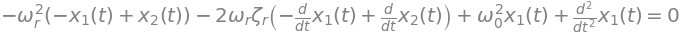

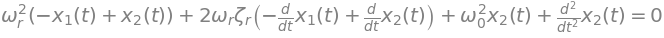

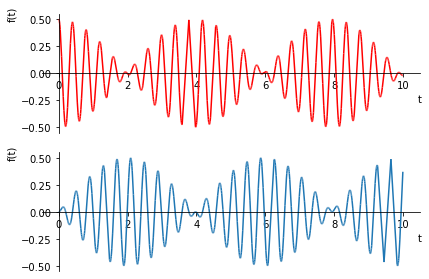

In [12]:
#二重振り子モデル(外力項無)
from sympy import *
from sympy.plotting import plot, plot3d, PlotGrid
init_printing(order='grevlex')

t, C1, C2, C3, C4 = symbols('t C1 C2 C3 C4')
x1, x2 = symbols('x_1 x_2', cls=Function, Function = True)
omg0, omgr, zr = symbols('omega_0 omega_r zeta_r',  positive=True)

eq_mtn1= Eq(Derivative(x1(t), t, 2) + omg0**2 *x1(t) - omgr**2 *(x2(t)-x1(t)) - 2*zr*omgr*(Derivative(x2(t), t, 1) - Derivative(x1(t), t, 1)),0)
eq_mtn2= Eq(Derivative(x2(t), t, 2) + omg0**2 *x2(t) + omgr**2 *(x2(t)-x1(t)) + 2*zr*omgr*(Derivative(x2(t), t, 1) - Derivative(x1(t), t, 1)),0)

display(eq_mtn1, eq_mtn2)

x_ics={x1(0):Rational(5,10), x2(0):0}; v_ics={x1(t).diff(t).subs(t,0):0, x2(t).diff(t).subs(t,0):0}

slvd_eqs=dsolve((eq_mtn1,eq_mtn2),ics=x_ics)

cnstnts = solve((
    Eq(diff(slvd_eqs[0].rhs,t).subs(t,0), v_ics[x1(t).diff(t).subs(t,0)]),
    Eq(diff(slvd_eqs[1].rhs,t).subs(t,0), v_ics[x2(t).diff(t).subs(t,0)])), {C1,C4}) # C1, C2, C3, C4 should be known...

sics={omg0:15, omgr:5, zr:0}

slvd_x1=slvd_eqs[0].rhs.subs(cnstnts).subs(sics) # m=1[kg], k0=100[N/m], kr=22.0[N/m], cr=10[N/(m/s)], zr=cr/(2*sqrt(kr*m))
slvd_x2=slvd_eqs[1].rhs.subs(cnstnts).subs(sics) # omg0=sqrt(k0/m)[rad/s], omgr=sqrt(kr/m)[rad/s] #zr:0にすればダンパなしと同じ

display(slvd_x1.rewrite(exp,cos,sin),slvd_x2.rewrite(exp,cos,sin))

plts1 = plot(slvd_x1, (t,0,10), line_color='r', show=False)
plts2 = plot(slvd_x2, (t,0,10), show=False)

PlotGrid(2, 1, plts1, plts2)

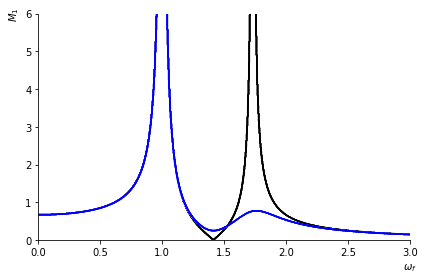

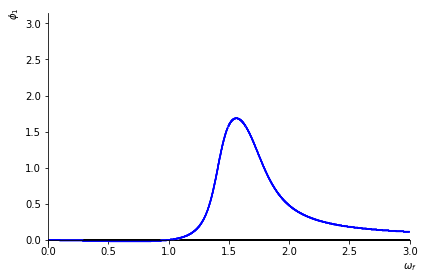

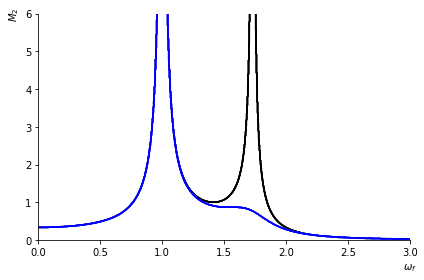

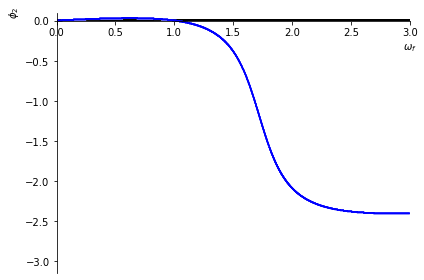

In [ ]:
#@title 減衰比$\zeta$の変化に伴う応答
#@markdown 発散部分の調整が難しい。atan2でも単純にできない。
from sympy import *
init_printing(order='rev-lex')

z1, z2 = symbols('z1, z2')
omg, f0, phi= symbols('$\omega_f$, f_0, varphi', positive=True)
t, omg0, omgr, ztr, zt1 = symbols('t, omega_0, omega_r, zeta_r, zeta_1', positive=True) 
X1, X2 = symbols('X_1, X_2')
a = symbols('a', real=True)
M1, M2, phi1, phi2 = symbols('$M_1$, $M_2$, $\phi_1$, $\phi_2$', positive=True)
M11, M21, phi11, phi21 = symbols('M_11, M_21, \phi_11, \phi_21', positive=True)

omg0=1; omgr=1 

z1 = X1*exp(I*(omg*t))
z2 = X2*exp(I*(omg*t))
#display(z1,z2)

dfeq_z1 = Eq(diff(z1,t,2) + omg0**2*z1 - omgr**2*(z2-z1) - 2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1) ), f0*exp(I*(omg*t)))
dfeq_z2 = Eq(diff(z2,t,2) + omg0**2*z2 + omgr**2*(z2-z1) + 2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1) ), 0)
#display(dfeq_z1)
#display(dfeq_z2)

slvd = solve([dfeq_z1.subs({t:0}), dfeq_z2.subs({t:0})], X1, X2)
#display(slvd)

amp1 = Eq(M1, (abs(slvd[X1])/(f0/omg0**2)).simplify())
pha1 = Eq(phi1, atan((im(slvd[X1])/re(slvd[X1])).simplify()))
amp2 = Eq(M2, (abs(slvd[X2])/(f0/omg0**2)).simplify())
pha2 = Eq(phi2, atan((im(slvd[X2])/re(slvd[X2])).simplify()))
#display(amp1, pha1.simplify(), amp2, pha2)

cnd = {ztr:0.00000001}

amp1_cnd = amp1.subs(cnd)
pha1_cnd = pha1.subs(cnd)
amp2_cnd = amp2.subs(cnd)
pha2_cnd = pha2.subs(cnd)
#display(amp1_cnd, pha1_cnd, amp2_cnd, pha2_cnd)

pa1 = plot_implicit(amp1_cnd, (omg, 0, 3), (M1, 0, 6),adaptive=False,points=1000, line_color='k', show=False)
pp1 = plot_implicit(pha1_cnd, (omg, 0, 3), (phi1, -0.1, pi),adaptive=False,points=1000, line_color='k', show=False)
pa2 = plot_implicit(amp2_cnd, (omg, 0, 3), (M2, 0, 6),adaptive=False,points=1000, line_color='k', show=False)
pp2 = plot_implicit(pha2_cnd, (omg, 0, 3), (phi2, -pi, 0.1),adaptive=False,points=1000, line_color='k', show=False)

dfeq_z11 = Eq(diff(z1,t,2) + omg0**2*z1 - omgr**2*(z2-z1) - 2*omgr*zt1*(diff(z2,t,1)-diff(z1,t,1) ), f0*exp(I*(omg*t)))
dfeq_z21 = Eq(diff(z2,t,2) + omg0**2*z2 + omgr**2*(z2-z1) + 2*omgr*zt1*(diff(z2,t,1)-diff(z1,t,1) ), 0)

slvd1 = solve([dfeq_z11.subs({t:0}), dfeq_z21.subs({t:0})], X1, X2)

amp11 = Eq(M11, (abs(slvd1[X1])/(f0/omg0**2)).simplify())
pha11 = Eq(phi11, atan((im(slvd1[X1])/re(slvd1[X1])).simplify()))
amp21 = Eq(M21, (abs(slvd1[X2])/(f0/omg0**2)).simplify())
pha21 = Eq(phi21, atan((im(slvd1[X2])/re(slvd1[X2])).simplify()))

cnd1 = {zt1:0.1}

amp11_cnd = amp11.subs(cnd1)
pha11_cnd = pha11.subs(cnd1)
amp21_cnd = amp21.subs(cnd1)
pha21_cnd = pha21.subs(cnd1)

pa11 = plot_implicit(amp11_cnd, (omg, 0, 3), (M11, 0, 6),adaptive=False,points=1000, line_color='b', show=False)
pp11 = plot_implicit(pha11_cnd, (omg, 0, 1.494), (phi11, -pi, pi),adaptive=False,points=1000, line_color='b', show=False)
pa21 = plot_implicit(amp21_cnd, (omg, 0, 3), (M21, 0, 6),adaptive=False,points=1000, line_color='b', show=False)
pp21 = plot_implicit(pha21_cnd, (omg, 0, 1.805), (phi21, -pi, pi),adaptive=False,points=1000, line_color='b', show=False)

pha11s = Eq(phi11, atan((im(slvd1[X1])/re(slvd1[X1])).simplify())+pi).subs(cnd1)
pp11s = plot_implicit(pha11s, (omg, 1.495, 1.639), (phi11, -pi, pi),adaptive=False,points=1000, line_color='b', show=False)
pp11d = plot_implicit(pha11_cnd, (omg, 1.64, 3), (phi11, -pi, pi),adaptive=False,points=1000, line_color='b', show=False)

pha21d = Eq(phi21, atan((im(slvd1[X2])/re(slvd1[X2])).simplify())-pi).subs(cnd1)
pp21d = plot_implicit(pha21d, (omg, 1.806, 3), (phi21, -pi, pi),adaptive=False,points=1000, line_color='b', show=False)

pa1.append(pa11[0])
pp1.append(pp11[0])
pa2.append(pa21[0])
pp2.append(pp21[0])

pp1.append(pp11s[0])
pp1.append(pp11d[0])

pp2.append(pp21d[0])

pa1.show()
pp1.show()
pa2.show()
pp2.show()

#1自由度（非線形）振幅・位相

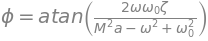

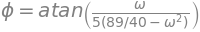

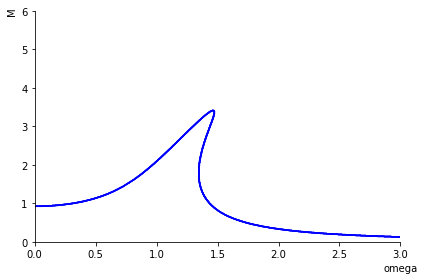

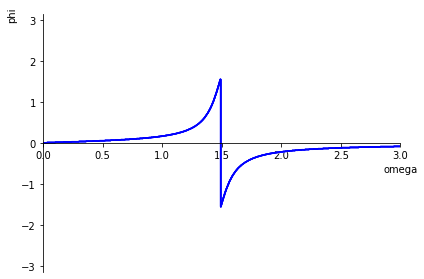

In [ ]:
#@title 基本
#@markdown １自由度非線形：振幅応答 $M$, 位相応答 $\phi$
from sympy import *
init_printing()

z = symbols('z')
t, omg0, omg, zt, f0= symbols('t, omega_0, omega, zeta, f_0', extended_positive=True)
X = symbols('M', positive=True)
a, phi = symbols('a phi', real=True)

z = X*exp(I*(omg*t))
dfeq_z = Eq(diff(z,t,2) +2*zt*omg0*diff(z,t,1) +omg0**2*z + a*(z**3), f0*exp(I*(omg*t+phi)))
display(dfeq_z)
dfeq_real = Eq(re(dfeq_z.lhs.subs({t:0})),re(dfeq_z.rhs.subs({t:0})))
dfeq_imag = Eq(im(dfeq_z.lhs.subs({t:0})),im(dfeq_z.rhs.subs({t:0})))
display(dfeq_real, dfeq_imag)

amp = Eq((re(dfeq_z.lhs.subs({t:0}))**2 + im(dfeq_z.lhs.subs({t:0}))**2).simplify(),
      (re(dfeq_z.rhs.subs({t:0}))**2 + im(dfeq_z.rhs.subs({t:0}))**2).simplify())
pha = Eq(phi, atan((im(dfeq_z.lhs.subs({t:0}))/re(dfeq_z.lhs.subs({t:0}))).simplify()))
display(amp,pha)

cnd = {omg0:1, zt:0.1, a:0.1, f0:1} #任意の定数(固有振動数、減衰比、非線形ばね定数、外力定数)を決める。

amp_cnd = amp.subs(cnd)
pha_cnd = pha.subs(cnd).subs({X:Rational(35,10)})
display(amp_cnd,pha_cnd)

p_amp = plot_implicit(amp_cnd, (omg, 0, 3), (X, 0, 6),adaptive=False,points=1000)
p_pha = plot_implicit(pha_cnd, (omg, 0, 3), (phi, -pi, pi),adaptive=False,points=1000)

##応用

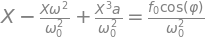

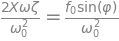

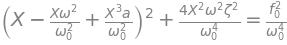

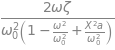

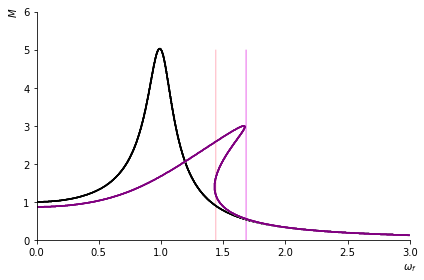

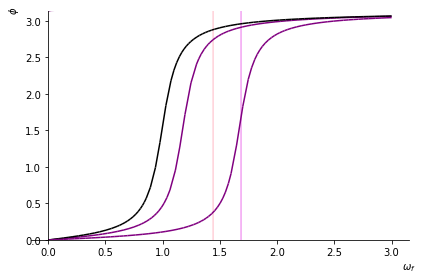

In [ ]:
#@title ヒステリシスの説明
from sympy import *
init_printing(order='rev-lex')

z = symbols('z')
t, omg0, omg, zt, f0= symbols('t, omega_0, omega, zeta, f_0', extended_positive=True)
X = symbols('X', extended_positive=True)
a, phi = symbols('a varphi', real=True)

z = X*exp(I*(omg*t))
dfeq_z = Eq(diff(z,t,2) +2*zt*diff(z,t,1) +omg0**2*z + a*(z**3), f0*exp(I*(omg*t+phi)))
display(dfeq_z)
dfeq_real = Eq(re(dfeq_z.lhs/omg0**2).expand(),re(dfeq_z.rhs/omg0**2).expand()).subs({omg*t:0})
dfeq_imag = Eq(im(dfeq_z.lhs/omg0**2).expand(),im(dfeq_z.rhs/omg0**2).expand()).subs({omg*t:0})
display(dfeq_real, dfeq_imag)

dic_v={f0/omg0**2:1, omg0:1, zt:0.1}
mnfld = Eq(dfeq_real.lhs**2 + dfeq_imag.lhs**2,
           (dfeq_real.rhs**2 + dfeq_imag.rhs**2).simplify())
tan_phi = im(dfeq_z.lhs/omg0**2/X).expand()/re(dfeq_z.lhs/omg0**2/X).expand() # tan = sin/cos = im(z)/re(z)
display(mnfld, tan_phi.subs({omg*t:0}))

atan_X = atan(tan_phi.subs({omg*t:0}).subs(dic_v))
atan_X = atan2(im(dfeq_z.lhs/omg0**2/X).expand(),re(dfeq_z.lhs/omg0**2/X).expand()).subs({omg*t:0}).subs(dic_v)
apls= mnfld.subs(dic_v).subs({a:0.2}) #漸硬ばねの追加
#amns= mnfld.subs(dic_v).subs({a:-0.01}) #漸軟ばねの追加
azrs= mnfld.subs(dic_v).subs({a:0})
#display(apls, amns, azrs)

p_zrs= plot_implicit(azrs, (omg, 0, 3), (X, 0, 6),adaptive=False,points=1000,line_color='k',show=False, xlabel='$\omega_f$', ylabel='$M$')
p_pls= plot_implicit(apls, (omg, 0, 3), (X, 0, 6),adaptive=False,points=1000,line_color='purple',show=False)
#p_mns= plot_implicit(amns, (omg, 0, 3), (X, 0, 6),adaptive=False,points=1000,line_color='b',show=False)

p1=plot_implicit(omg-1.68, omg_var=omg, line_color='violet', show=False)
p2=plot_implicit(omg-1.44, omg_var=omg, line_color='pink', show=False)

p_zrs.append(p_pls[0])
#p_zrs.append(p_mns[0])
p_zrs.append(p1[0])
p_zrs.append(p2[0])
p_zrs.show()

display(atan_X)
atan_pXsml=atan_X.subs({a:0.2}).subs({X:1.4})
atan_pXnrm=atan_X.subs({a:0})
atan_pXbig=atan_X.subs({a:0.2}).subs({X:3})

p_pXsml = plot(atan_pXsml,(omg, 0, 3), ylim=(0,pi), line_color='purple', xlabel='$\omega_f$', ylabel='$\phi$', show=False)
p_pXsmlSft = plot(atan_pXsml+pi,(omg, 0, 3), ylim=(0,pi), line_color='purple', show=False)
p_pXsml.append(p_pXsmlSft[0])

p_pXnrm = plot(atan_pXnrm,(omg, 0, 3), ylim=(0,pi), line_color='k', show=False)
p_pXnrmSft = plot(atan_pXnrm+pi,(omg, 0, 3), ylim=(0,pi), line_color='k', show=False)
p_pXsml.append(p_pXnrm[0])
p_pXsml.append(p_pXnrmSft[0])

p_pXbig    = plot(atan_pXbig,(omg, 0, 3), ylim=(0,pi), line_color='purple', show=False)
p_pXbigSft = plot(atan_pXbig+pi,(omg, 0, 3), ylim=(0,pi), line_color='purple', show=False)
p_pXsml.append(p_pXbig[0])
p_pXsml.append(p_pXbigSft[0])

p_pXsml.append(p1[0])
p_pXsml.append(p2[0])

p_pXsml.show()

#2自由度（非線形）振幅・位相

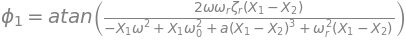

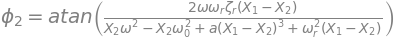

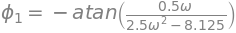

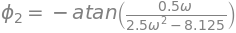

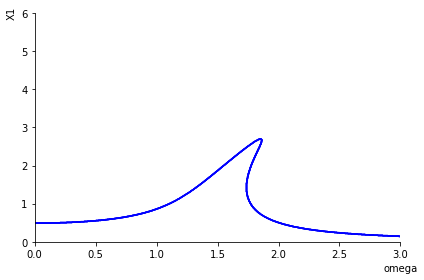

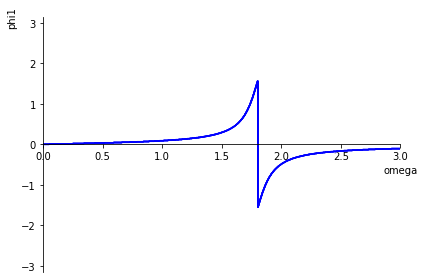

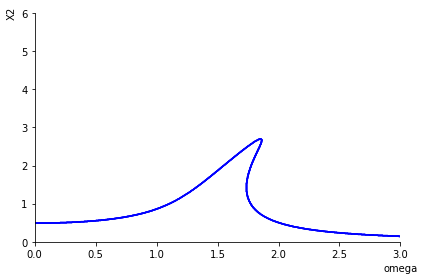

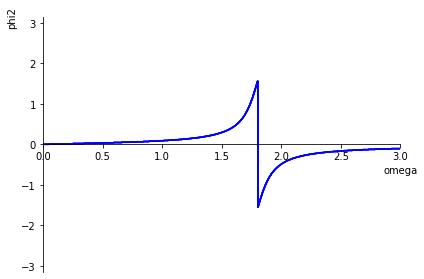

In [ ]:
#@title 基本
#@markdown ２自由度非線形：振幅応答 $M$, 位相応答 $\phi$
from sympy import *
init_printing()

z1, z2 = symbols('z1 z2')
omg, f0= symbols('omega, f_0', positive=True)
t, omg0, omgr, ztr = symbols('t, omega_0, omega_r, zeta_r', positive=True)
X1, X2 = symbols('X1 X2', positive=True)
a, phi1, phi2 = symbols('a phi1 phi2', real=True)

z1 = X1*exp(I*(omg*t))
z2 = X2*exp(I*(omg*t))
dfeq_z1 = Eq(diff(z1,t,2) + omg0**2*z1 - omgr**2*(z2-z1) - 2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1)) - a*(z2-z1)**3, f0*exp(I*(omg*t+phi1)))
dfeq_z2 = Eq(diff(z2,t,2) + omg0**2*z2 + omgr**2*(z2-z1) + 2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1)) + a*(z2-z1)**3, f0*exp(I*(omg*t+phi2)))
display(dfeq_z1, dfeq_z2)
dfeq1_real = Eq(re(dfeq_z1.lhs.subs({t:0})),re(dfeq_z1.rhs.subs({t:0})))
dfeq1_imag = Eq(im(dfeq_z1.lhs.subs({t:0})),im(dfeq_z1.rhs.subs({t:0})))
dfeq2_real = Eq(re(dfeq_z2.lhs.subs({t:0})),re(dfeq_z2.rhs.subs({t:0})))
dfeq2_imag = Eq(im(dfeq_z2.lhs.subs({t:0})),im(dfeq_z2.rhs.subs({t:0})))
display(dfeq1_real, dfeq1_imag, dfeq2_real, dfeq2_imag)

amp1 = Eq((re(dfeq_z1.lhs.subs({t:0}))**2 + im(dfeq_z1.lhs.subs({t:0}))**2).simplify(),
          (re(dfeq_z1.rhs.subs({t:0}))**2 + im(dfeq_z1.rhs.subs({t:0}))**2).simplify())
pha1 = Eq(phi1, atan(im(dfeq_z1.lhs.subs({t:0}))/re(dfeq_z1.lhs.subs({t:0}))).simplify())
amp2 = Eq((re(dfeq_z2.lhs.subs({t:0}))**2 + im(dfeq_z2.lhs.subs({t:0}))**2).simplify(),
          (re(dfeq_z2.rhs.subs({t:0}))**2 + im(dfeq_z2.rhs.subs({t:0}))**2).simplify())
pha2 = Eq(phi2, atan(im(dfeq_z2.lhs.subs({t:0}))/re(dfeq_z2.lhs.subs({t:0}))).simplify())
display(amp1, pha1, amp2, pha2)

cnd = {omg0:1, omgr:1, ztr:0.1, a:0.2, f0:1} #任意の定数(固有振動数、減衰比、非線形ばね定数、外力定数)を決める。

amp1_cnd = amp1.subs(cnd).subs({X2:0}).simplify()
pha1_cnd = pha1.subs(cnd).subs({X2:0}).subs({X1:2.5}).simplify()
amp2_cnd = amp2.subs(cnd).subs({X1:0}).simplify()
pha2_cnd = pha2.subs(cnd).subs({X1:0}).subs({X2:2.5}).simplify()
display(amp1_cnd, pha1_cnd, amp2_cnd, pha2_cnd)

p_amp1 = plot_implicit(amp1_cnd, (omg, 0, 3), (X1, 0, 6),adaptive=False,points=1000)
p_pha1 = plot_implicit(pha1_cnd, (omg, 0, 3), (phi1, -pi, pi),adaptive=False,points=1000)
p_amp2 = plot_implicit(amp2_cnd, (omg, 0, 3), (X2, 0, 6),adaptive=False,points=1000)
p_pha2 = plot_implicit(pha2_cnd, (omg, 0, 3), (phi2, -pi, pi),adaptive=False,points=1000)

##応用

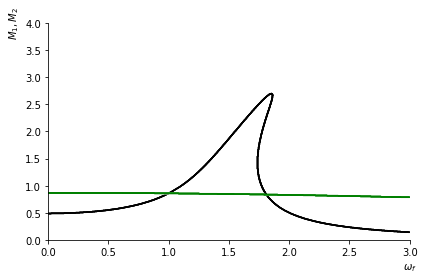

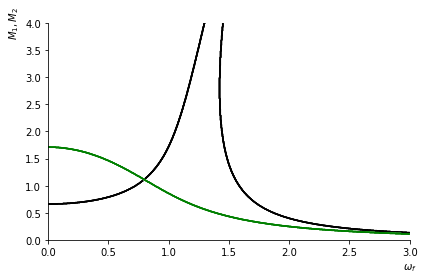

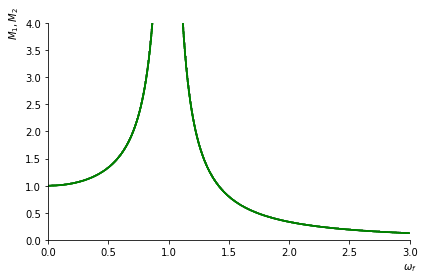

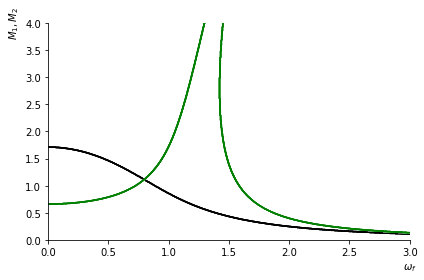

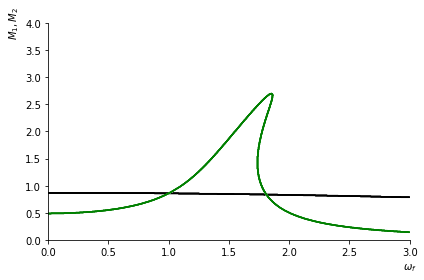

In [ ]:
#@title メトロノームの同期
#@markdown $M_1$,$M_2$の条件を変化させて振幅応答を表示
from sympy import *
init_printing(order='rev-lex')

z1, z2 = symbols('z1 z2')
omg, f0= symbols('omega, f_0', positive=True)
t, omg0, omgr, ztr = symbols('t, omega_0, omega_r, zeta_r', positive=True)
A1, A2 = symbols('A1 A2', extended_positive=True)
a, phi1, phi2 = symbols('a varphi1 varphi2', real=True)

z1 = A1*exp(I*(omg*t))
z2 = A2*exp(I*(omg*t))
dfeq_z1 = Eq(diff(z1,t,2) + 1*omg0**2*z1 - omgr**2*(z2-z1) -2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1)) - a*(z2-z1)**3, f0*exp(I*(omg*t+phi1)))
dfeq_z2 = Eq(diff(z2,t,2) + 1*omg0**2*z2 + omgr**2*(z2-z1) +2*omgr*ztr*(diff(z2,t,1)-diff(z1,t,1)) + a*(z2-z1)**3, f0*exp(I*(omg*t+phi2)))

dfeq1_real = Eq(re(dfeq_z1.lhs.subs({omg*t:0})),re(dfeq_z1.rhs.subs({omg*t:0})))
dfeq1_imag = Eq(im(dfeq_z1.lhs.subs({omg*t:0})),im(dfeq_z1.rhs.subs({omg*t:0})))
dfeq2_real = Eq(re(dfeq_z2.lhs.subs({omg*t:0})),re(dfeq_z2.rhs.subs({omg*t:0})))
dfeq2_imag = Eq(im(dfeq_z2.lhs.subs({omg*t:0})),im(dfeq_z2.rhs.subs({omg*t:0})))
display(dfeq1_real, dfeq1_imag)

mnfld1=Eq((dfeq1_real.lhs**2 + dfeq1_imag.lhs**2).simplify()/omg0**4,
          (dfeq1_real.rhs**2 + dfeq1_imag.rhs**2).simplify()/omg0**4)
mnfld2=Eq((dfeq2_real.lhs**2 + dfeq2_imag.lhs**2).simplify()/omg0**4,
          (dfeq2_real.rhs**2 + dfeq2_imag.rhs**2).simplify()/omg0**4)
#display(mnfld1, mnfld2)

dic_v={f0:omg0**2, omg0:10**0, omgr:10**0, ztr:0.1, a:0.2}

v_mnfld1=mnfld1.subs(dic_v)
v_mnfld2=mnfld2.subs(dic_v)
display(v_mnfld1, v_mnfld2)

n=Rational(2,1)

A1_1= plot_implicit(v_mnfld1.subs({A2:0}), (omg, 0, 3), (A1, 0, 4),line_color='k', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
A1_2= plot_implicit(v_mnfld2.subs({A2:0}), (omg, 0, 3), (A1, 0, 4),line_color='g', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)

A1_1.append(A1_2[0])
#A1_1.show()

A2_1= plot_implicit(v_mnfld1.subs({A1:0}), (omg, 0, 3), (A2, 0, 4),line_color='k', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
A2_2= plot_implicit(v_mnfld2.subs({A1:0}), (omg, 0, 3), (A2, 0, 4),line_color='g', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
A2_1.append(A2_2[0])
#A2_1.show()

AA_1= plot_implicit(v_mnfld1.subs({A2:A1}), (omg, 0, 3), (A1, 0, 4),line_color='k', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
AA_2= plot_implicit(v_mnfld2.subs({A2:A1}), (omg, 0, 3), (A1, 0, 4),line_color='g', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=2000,show=False)
AA_1.append(AA_2[0])
#AA_1.show()

Aq_1= plot_implicit(v_mnfld1.subs({A2:n*A1}),   (omg, 0, 3), (A1, 0, 4),line_color='k', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
Aq_2= plot_implicit(v_mnfld2.subs({A1:1/n*A2}), (omg, 0, 3), (A2, 0, 4),line_color='g', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
Aq_1.append(Aq_2[0])
#Aq_1.show()

Ar_1= plot_implicit(v_mnfld1.subs({A2:1/n*A1}), (omg, 0, 3), (A1, 0, 4),line_color='k', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
Ar_2= plot_implicit(v_mnfld2.subs({A1:n*A2}),   (omg, 0, 3), (A2, 0, 4),line_color='g', xlabel='$\omega_f$',ylabel='$M_1,M_2$',adaptive=False,points=1000,show=False)
Ar_1.append(Ar_2[0])
#A1_1.show()

A1_1.show()
Ar_1.show()
AA_1.show()
Aq_1.show()
A2_1.show()

# 参考資料
- https://home.hirosaki-u.ac.jp/jupyter/python/
- https://home.hirosaki-u.ac.jp/jupyter/python-sk/